In [13]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', 1000)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199


def read_csv_files_in_folder(folder_path):
    dfs = []
    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            file_path = os.path.join(folder_path, file)
            
            # Extract information from the filename
            filename_parts = file[:-4].split("_")  # Remove .csv extension and split by underscore
            dataset = filename_parts[0]
            query_language = filename_parts[1]
            schema = filename_parts[3]
            shots = filename_parts[4]
            llm = filename_parts[5]
            
            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)
            
            # Add the extracted information as new columns to the DataFrame
            df["dataset"] = dataset
            df["query_language"] = query_language
            df["schema"] = schema
            df["shots"] = shots
            df["llm"] = llm
            
            dfs.append(df)
    
    # Concatenate all DataFrames into a single DataFrame
    combined_df = pd.concat(dfs, ignore_index=True)
    return combined_df

# Specify the folder path containing the CSV files
folder_path = "../mql_results_processed/eval/LLM_results_processed_mql_test/"

# Call the function to read all CSV files in the folder
df = read_csv_files_in_folder(folder_path)

In [18]:
# df

In [19]:
df.columns

Index(['question', 'sparql', 'sql', 'cypher', 'mql', 'mql.1', 'question_type',
       'class', 'cypher_results', 'cypher_query_time', 'sparql_results',
       'sparql_query_time', 'sql_results', 'sql_query_time', 'mql_results',
       'mql_results.1', 'mql_query_time', 'mql_query_time.1',
       'cleaned_mql_llm_query', 'mql_llm_results', 'mql_llm_time', 'mql_label',
       'mql_ves', 'dataset', 'query_language', 'schema', 'shots', 'llm'],
      dtype='object')

In [20]:
accuracy_df = df.groupby(["query_language", "llm", "schema", "shots"])["mql_label"].mean().reset_index()
accuracy_df = accuracy_df.rename(columns={"mql_label": "mean_accuracy"})
accuracy_df["mean_accuracy"] = accuracy_df["mean_accuracy"] * 100
accuracy_df

,query_language,llm,schema,shots,mean_accuracy
0,mql,gemini,0schema,fewshots,13.15
1,mql,gemini,0schema,oneshot,3.25
2,mql,gemini,schema,0shot,3.90
3,mql,gemini,schema,fewshots,34.60
4,mql,gemini,schema,oneshot,20.50
5,mql,gpt-3.5-turbo-0125,0schema,fewshots,0.55
6,mql,gpt-3.5-turbo-0125,0schema,oneshot,0.00
7,mql,gpt-3.5-turbo-0125,schema,0shot,6.90
8,mql,gpt-3.5-turbo-0125,schema,fewshots,10.75
9,mql,gpt-3.5-turbo-0125,schema,oneshot,9.30


In [22]:
accuracy_df_type = df.groupby(["query_language", "llm", "class"])["mql_label"].mean().reset_index()
accuracy_df_type = accuracy_df_type.rename(columns={"mql_label": "mean_accuracy"})
accuracy_df_type["mean_accuracy"] = accuracy_df_type["mean_accuracy"] * 100
accuracy_df_type

,query_language,llm,class,mean_accuracy
0,mql,gemini,allergies,16.909871
1,mql,gemini,careplans,6.363636
2,mql,gemini,claims,10.000000
3,mql,gemini,claims_transactions,27.666667
4,mql,gemini,conditions,18.412698
5,mql,gemini,devices,5.194805
6,mql,gemini,encounters,29.411765
7,mql,gemini,imaging_studies,6.153846
8,mql,gemini,immunizations,3.333333
9,mql,gemini,medications,6.382979


In [34]:
df.loc[(df["mql"].str.contains("No answer possible")) & (df["cleaned_mql_llm_query"].str.contains("No answer possible")), "mql_label"] = 1

In [48]:
accuracy_df_type = df.groupby(["query_language", "llm", "schema", "shots", "class"])["mql_label"].mean().reset_index()
accuracy_df_type = accuracy_df_type.rename(columns={"mql_label": "mean_accuracy"})
accuracy_df_type["mean_accuracy"] = accuracy_df_type["mean_accuracy"] * 100
accuracy_df_type

,query_language,llm,schema,shots,class,mean_accuracy
0,mql,gemini,0schema,fewshots,allergies,9.442060
1,mql,gemini,0schema,fewshots,careplans,0.000000
2,mql,gemini,0schema,fewshots,claims,20.588235
3,mql,gemini,0schema,fewshots,claims_transactions,48.333333
4,mql,gemini,0schema,fewshots,conditions,11.111111
5,mql,gemini,0schema,fewshots,devices,7.792208
6,mql,gemini,0schema,fewshots,encounters,22.352941
7,mql,gemini,0schema,fewshots,imaging_studies,14.102564
8,mql,gemini,0schema,fewshots,immunizations,1.388889
9,mql,gemini,0schema,fewshots,medications,7.446809


In [36]:
accuracy_df = df.groupby(["query_language", "llm", "schema", "shots"])["mql_label"].mean().reset_index()
accuracy_df = accuracy_df.rename(columns={"mql_label": "mean_accuracy"})
accuracy_df["mean_accuracy"] = accuracy_df["mean_accuracy"] * 100
accuracy_df

,query_language,llm,schema,shots,mean_accuracy
0,mql,gemini,0schema,fewshots,15.90
1,mql,gemini,0schema,oneshot,6.00
2,mql,gemini,schema,0shot,5.65
3,mql,gemini,schema,fewshots,36.95
4,mql,gemini,schema,oneshot,22.45
5,mql,gpt-3.5-turbo-0125,0schema,fewshots,3.30
6,mql,gpt-3.5-turbo-0125,0schema,oneshot,2.75
7,mql,gpt-3.5-turbo-0125,schema,0shot,9.55
8,mql,gpt-3.5-turbo-0125,schema,fewshots,13.50
9,mql,gpt-3.5-turbo-0125,schema,oneshot,12.00


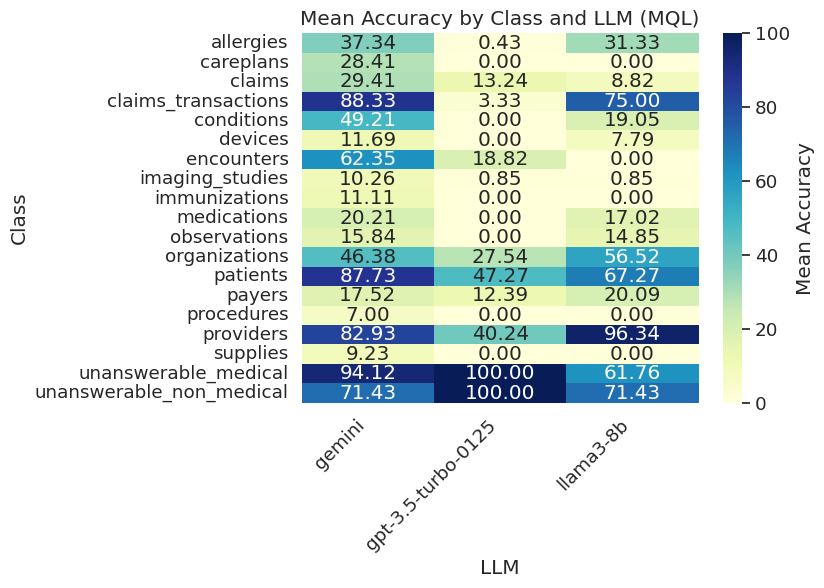

<Figure size 1200x1000 with 0 Axes>

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called 'df'
# If not, you can create a DataFrame from the provided data


filtered_df = accuracy_df_type[(accuracy_df_type["schema"] == "schema") & (accuracy_df_type["shots"] == "fewshots")]
# Pivot the DataFrame to reshape it for plotting
df_pivot = filtered_df.pivot(index='class', columns='llm', values='mean_accuracy')

# Set the style to a more professional look
sns.set(style='whitegrid', font_scale=1.2)

# Create a custom sequential color palette
palette = sns.color_palette("YlGnBu", as_cmap=True)
# palette = sns.diverging_palette(h_neg=0, h_pos=120, s=99, l=50, sep=1, as_cmap=True)
# palette = sns.color_palette("Greens", as_cmap=True)

# Create a heatmap using Seaborn with the custom color palette
ax = sns.heatmap(df_pivot, cmap=palette, annot=True, fmt='.2f', cbar_kws={'label': 'Mean Accuracy'})

# Set the plot title and labels
ax.set_title('Mean Accuracy by Class and LLM (MQL)')
ax.set_xlabel('LLM')
ax.set_ylabel('Class')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the plot size
plt.figure(figsize=(12, 10))

# Display the plot
plt.tight_layout()
plt.show()

In [58]:
df_pivot

llm,gemini,gpt-3.5-turbo-0125,llama3-8b
class,,,
allergies,37.339056,0.429185,31.330472
careplans,28.409091,0.000000,0.000000
claims,29.411765,13.235294,8.823529
claims_transactions,88.333333,3.333333,75.000000
conditions,49.206349,0.000000,19.047619
devices,11.688312,0.000000,7.792208
encounters,62.352941,18.823529,0.000000
imaging_studies,10.256410,0.854701,0.854701
immunizations,11.111111,0.000000,0.000000
